# Data description
The image folder contains a set of images with samples of road / buildings / vegetation cover
Image dimension : 640 x 500
The midpoint of each image is considered as the location of a shop.
Your task is to find the distance from the front side of the shop to the nearest road/building in
the same direction.

## FIrst approach with manual calculation

### Importing the Libraries

In the first approach we will be showing the process step by step wise and in the second part we will try to automate it by providing image name only.

In [1]:
from PIL import Image
from matplotlib import image
from matplotlib import pyplot as plt

Importing the image and viewing and checking the size

In [2]:
img = Image.open('Images/tmp_1.png')

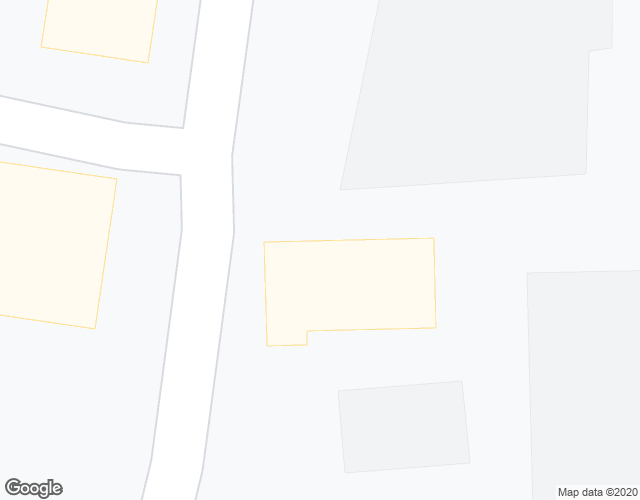

In [3]:
img

In [4]:
img.size

(640, 500)

Finding out the midpoint of the image by using the image size and plotting it on the image.

In [5]:
x = (img.size[0])//2
y = (img.size[1])//2
mpoint = (x, y) 

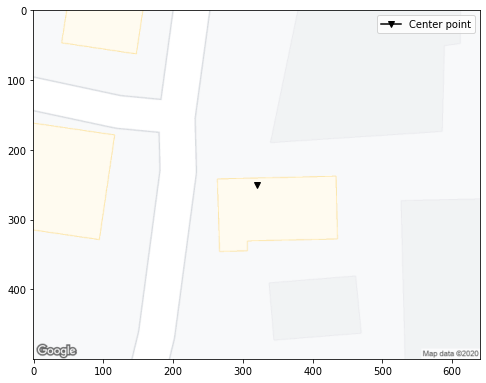

In [6]:
plt.figure(figsize=(8,8))
plt.plot(mpoint[0], mpoint[1], marker='v', color="black", label='Center point')
plt.imshow(img)
plt.legend()
plt.show()

Converting the image to grayscale for better and easy computation and manipulation

In [7]:
img = img.convert('LA')

Here we are starting from the center of the image and will try to move in all directions. We will select the direction of finding the house/building, road, vegetation cover, etc. from this step. The pixel values are used to differentiate the values and loop is breaked when a new object is identified. The distance in all the directions are saved and will be used for future reference.

In [8]:
center = mpoint
x = center[0]
y = center[1]

distRight = 0

for i in range(x, img.size[0]):
    val = (i, center[1])
    if img.getpixel(val)!=img.getpixel(center):
        break
    distRight += 1
    cordRight = val
    
distLeft = 0
for i in range(x, 0, -1):
    val = (i, center[1])
    if img.getpixel(val)!=img.getpixel(center):
        break
    distLeft += 1
    cordLeft = val
        
distDown = 0
for i in range(y, img.size[1]):
    val = (center[0], i)
    if img.getpixel(val)!=img.getpixel(center):
        break
    distDown += 1
    cordDown = val
        
distUp = 0
for i in range(y, 0, -1):
    val = (center[0], i)
    if img.getpixel(val)!=img.getpixel(center):
        break
    distUp += 1
    cordUp = val
        
centersummary = {'distanceUp': distUp,
                'CordUp': cordUp,
                'distanceDown': distDown,
                'CordDown': cordDown,
                'distanceLeft': distLeft,
                'CordLeft': cordLeft,
                'distanceRight': distRight,
                'CordRight': cordRight}

We try to find out the side which has the least distance which will help in detemining the face of the shop.

In [9]:
direction = {'distanceUp': centersummary['distanceUp'],
                'distanceDown': centersummary['distanceDown'],
                'distanceLeft': centersummary['distanceLeft'],
                'distanceRight': centersummary['distanceRight']}

direction = min(direction, key=direction.get)

We define a function to calculate Eucledian Distance between 2 coordinates to find the distance between 2 different points.

In [10]:
def findDistance(x, y):
    a = (x[0] - y[0]) ** 2
    b = (x[1] - y[1]) ** 2
    ans = (a + b) ** 0.5 
    return int(ans)

The pixel values for all the different objects available in the maps are listed below which will help us in making decision of selection and movement.
- Pixel Value: (217, 255) Vegetation Cover
- Pixel Value: (254, 255) or (255, 255) Road
- Pixel Value: (242, 255) or (250, 255) Building
- Pixel Value: (248, 255) Empty Space

In the below section, we provide a list of pixel values which include all the landmarks in the map and remove the pixel value of the building which is the starting point.

In [11]:
landmark = [(217, 255), (255, 255), (254, 255), (242, 255), (250, 255)]
try:
    landmark.remove(img.getpixel(mpoint))
except:
    pass

# This code will work for those shops which have their front facing downwards in the map. We intially assign the values where
# the buidling ends and take it as a starting point for finding the nearest landmark. We calculate distance step for counting
# the steps taken for finding the nearest landmark
if direction == 'distanceUp':
    start = centersummary['CordUp']
    distUp = 0
    minval = 1000
    # minval represents the value for selecting the coordinates which have least distance from the shop present in the center.
    # We try to reduce the height pixel value one by one and try to increase and decrease the value of width pixel to find
    # distances which are present in a diagonal shape. It helps in covering the exceptional cases.
    for i in range(start[1], 0, -1):
        val = (start[0], i)
        for j in range(start[0], 0, -1):
            newval1 = (j, i)
            # We break the loop if we find any landmark or we reach the end of the image.
            if img.getpixel((j, i)) in landmark:
                break
        for j in range(start[0], img.size[0]):
            newval2 = (j, i)
            # We break the loop if we find any landmark or we reach the end of the image.
            if img.getpixel((j, i)) in landmark:
                break
        # we find out the distance between the two selected coordinates and save the coordinate which have less distance from
        # the starting points
        l = findDistance(centersummary['CordUp'], newval1)
        r = findDistance(centersummary['CordUp'], newval2)
        if r<minval:
            minval = r
            cordUp = newval2
        elif l<minval:
            minval = r
            cordUp = newval1
        distUp += 1
        # We break the loop if we find any landmark or we reach the end of the image.
        if img.getpixel(val) in landmark:
            break
        
# the below code will be executed in a similar approach but the the height value will increase and for the last two options the 
# width value will be decreased and increased with height value.
elif direction == 'distanceDown':
    start = centersummary['CordDown']
    distDown = 0
    minval = 1000
    for i in range(start[1], img.size[1]):
        val = (start[0], i)
        if distDown==1:
            landmark.append((img.getpixel(mpoint)))
        for j in range(start[0], 0, -1):
            newval1 = (j, i)
            if img.getpixel((j, i)) in landmark:
                break
        for j in range(start[0], img.size[0]):
            newval2 = (j, i)
            if img.getpixel((j, i)) in landmark:
                break
        l = findDistance(centersummary['CordDown'], newval1)
        r = findDistance(centersummary['CordDown'], newval2)
        if r<minval:
            minval = r
            cordDown = newval2
        elif l<minval:
            minval = r
            cordDown = newval1
        distDown += 1
        if img.getpixel(val) in landmark:
            break
        
elif direction == 'distanceLeft':
    start = centersummary['CordLeft']
    distLeft = 0
    minval = 1000
    for i in range(start[0], 0, -1):
        val = (i, start[1])
        for j in range(start[1], 0, -1):
            newval1 = (i, j)
            if img.getpixel((i, j)) in landmark:
                break
        for j in range(start[1], img.size[1]):
            newval2 = (i, j)
            if img.getpixel((i, j)) in landmark:
                break
        l = findDistance(centersummary['CordLeft'], newval1)
        r = findDistance(centersummary['CordLeft'], newval2)
        if r<minval:
            minval = r
            cordLeft = newval2
        elif l<minval:
            minval = r
            cordLeft = newval1
        distLeft += 1
        if img.getpixel(val) in landmark:
            break
        
elif direction == 'distanceRight':
    start = centersummary['CordRight']
    distRight = 0
    minval = 1000
    for i in range(start[0], img.size[0]):
        val = (i, start[1])
        for j in range(start[1], 0, -1):
            newval1 = (i, j)
            if img.getpixel((i, j)) in landmark:
                break
        for j in range(start[1], img.size[1]):
            newval2 = (i, j)
            if img.getpixel((i, j)) in landmark:
                break
        l = findDistance(centersummary['CordRight'], newval1)
        r = findDistance(centersummary['CordRight'], newval2)
        if r<minval:
            minval = r
            cordRight = newval2
        elif l<minval:
            minval = r
            cordRight = newval1
        distRight += 1
        if img.getpixel(val) in landmark:
            break
        
else:
    print(error)

This represents the minimum distance from the front of the shop and the nearest landmark. We list the coordinate value identified by the algorithm.

In [12]:
minval

55

In [13]:
cordUp

(340, 190)

We try to visualize the image. We plot the starting point i.e. center of the image, the front of the shop and the nearest land/building or road or Vegetation Cover.

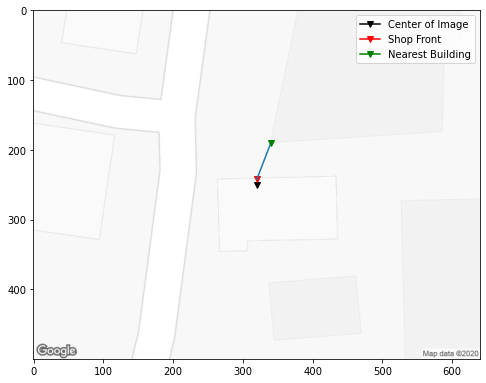

In [14]:
plt.figure(figsize=(8,8))
plt.plot(mpoint[0], mpoint[1], marker='v', color="black", label='Center of Image')
plt.plot(centersummary['CordUp'][0], centersummary['CordUp'][1], marker='v', color="red", label='Shop Front')
plt.plot([centersummary['CordUp'][0],cordUp[0]], [centersummary['CordUp'][1],cordUp[1]])
plt.plot(cordUp[0], cordUp[1], marker='v', color="green", label='Nearest Building')
plt.imshow(img)
plt.legend()
plt.show()

We print the value of the pixel value present in the nearest landmark option and try to classify it using the existing extracted value of the pixels from the images.

Below are the values of the middle point, shop front and nearest building coordinates

In [15]:
mpoint

(320, 250)

In [16]:
centersummary['CordUp']

(320, 242)

In [17]:
cordUp

(340, 190)

In [18]:
img.getpixel(cordUp)

(242, 255)

For the reference, we calculated that: 
- Pixel Value: (217, 255) Vegetation Cover
- Pixel Value: (254, 255) or (255, 255) or (248, 255) Road
- Pixel Value: (242, 255) or (250, 255) Building
- Pixel Value: (248, 255) Empty Space

We can conclude that we have find a building nearest to the front of the shop.

In [19]:
findDistance(centersummary['CordUp'], cordUp)

55

The distance from the shop present in the center of the map and the nearest building is 55.

Note: The values are calculated using pixel values.

### Answer: tmp1, 55, Buidling

In [20]:
print('tmp1, '+str(55)+', '+'Building')

tmp1, 55, Building


## Second Approach with automatic calculation

Function which will calculate the mid point of the image

In [21]:
def midPoint(image):
    x = (image.size[0])//2
    y = (image.size[1])//2
    return (x, y) 

Function which will find the distance from the point to all the sides of the shop

In [22]:
def findDirection(img):
    center = midPoint(img)
    x = center[0]
    y = center[1]
    # for right side
    distRight = 0
    for i in range(x, img.size[0]):
        val = (i, center[1])
        if img.getpixel(val)!=img.getpixel(center):
            break
        distRight += 1
        cordRight = val
    
    distLeft = 0
    for i in range(x, 0, -1):
        val = (i, center[1])
        if img.getpixel(val)!=img.getpixel(center):
            break
        distLeft += 1
        cordLeft = val
        
    distDown = 0
    for i in range(y, img.size[1]):
        val = (center[0], i)
        if img.getpixel(val)!=img.getpixel(center):
            break
        distDown += 1
        cordDown = val
        
    distUp = 0
    for i in range(y, 0, -1):
        val = (center[0], i)
        if img.getpixel(val)!=img.getpixel(center):
            break
        distUp += 1
        cordUp = val
        
    return {'distanceUp': distUp,
            'CordUp': cordUp,
            'distanceDown': distDown,
            'CordDown': cordDown,
            'distanceLeft': distLeft,
            'CordLeft': cordLeft,
            'distanceRight': distRight,
            'CordRight': cordRight}

Function to find the front of the shop

In [23]:
def findSide(summary):
    direction = {'distanceUp': summary['distanceUp'],
                'distanceDown': summary['distanceDown'],
                'distanceLeft': summary['distanceLeft'],
                'distanceRight': summary['distanceRight']}

    val = min(direction, key=direction.get)
    return val

Function to calculate the distance

In [24]:
def findDistance(x, y):
    a = (x[0] - y[0]) ** 2
    b = (x[1] - y[1]) ** 2
    ans = (a + b) ** 0.5 
    return int(ans)

Function which will find the landmark in upward direction by iterating through different values of pixels

In [25]:
def findUp(img, landmark, centersummary):
    start = centersummary['CordUp']
    distUp = 0
    minval = 1000
    # minval represents the value for selecting the coordinates which have least distance from the shop present in the center.
    # We try to reduce the height pixel value one by one and try to increase and decrease the value of width pixel to find
    # distances which are present in a diagonal shape. It helps in covering the exceptional cases.
    for i in range(start[1], 0, -1):
        val = (start[0], i)
        for j in range(start[0], 0, -1):
            newval1 = (j, i)
            # We break the loop if we find any landmark or we reach the end of the image.
            if img.getpixel((j, i)) in landmark:
                break
        for j in range(start[0], img.size[0]):
            newval2 = (j, i)
            # We break the loop if we find any landmark or we reach the end of the image.
            if img.getpixel((j, i)) in landmark:
                break
        # We break the loop if we find any landmark or we reach the end of the image.
        # we find out the distance between the two selected coordinates and save the coordinate which have less distance from
        # the starting points
        l = findDistance(centersummary['CordUp'], newval1)
        r = findDistance(centersummary['CordUp'], newval2)
        if r<minval:
            minval = r
            cordUp = newval2
        elif l<minval:
            minval = r
            cordUp = newval1
        distUp += 1
        if img.getpixel(val) in landmark:
            break
    return (cordUp, distUp, minval)

Function which will find the landmark in downward direction by iterating through different values of pixels

In [26]:
def findDown(img, landmark, centersummary):
    start = centersummary['CordDown']
    distDown = 0
    minval = 1000
    for i in range(start[1], img.size[1]):
        val = (start[0], i)
        if distDown==1:
            landmark.append((img.getpixel(mpoint)))
        for j in range(start[0], 0, -1):
            newval1 = (j, i)
            if img.getpixel((j, i)) in landmark:
                break
        for j in range(start[0], img.size[0]):
            newval2 = (j, i)
            if img.getpixel((j, i)) in landmark:
                break
        l = findDistance(centersummary['CordDown'], newval1)
        r = findDistance(centersummary['CordDown'], newval2)
        if r<minval:
            minval = r
            cordDown = newval2
        elif l<minval:
            minval = r
            cordDown = newval1
        distDown += 1
        if img.getpixel(val) in landmark:
            break
    return (cordDown, distDown, minval)

Function which will find the landmark in left direction by iterating through different values of pixels

In [27]:
def findLeft(img, landmark, centersummary):
    start = centersummary['CordLeft']
    distLeft = 0
    minval = 1000
    for i in range(start[0], 0, -1):
        val = (i, start[1])
        for j in range(start[1], 0, -1):
            newval1 = (i, j)
            if img.getpixel((i, j)) in landmark:
                break
        for j in range(start[1], img.size[1]):
            newval2 = (i, j)
            if img.getpixel((i, j)) in landmark:
                break
        l = findDistance(centersummary['CordLeft'], newval1)
        r = findDistance(centersummary['CordLeft'], newval2)
        if r<minval:
            minval = r
            cordLeft = newval2
        elif l<minval:
            minval = r
            cordLeft = newval1
        distLeft += 1
        if img.getpixel(val) in landmark:
            break
    return (cordLeft, distLeft, minval)

Function which will find the landmark in right direction by iterating through different values of pixels

In [28]:
def findRight(img, landmark, centersummary):
    start = centersummary['CordRight']
    distRight = 0
    minval = 1000
    for i in range(start[0], img.size[0]):
        val = (i, start[1])
        for j in range(start[1], 0, -1):
            newval1 = (i, j)
            if img.getpixel((i, j)) in landmark:
                break
        for j in range(start[1], img.size[1]):
            newval2 = (i, j)
            if img.getpixel((i, j)) in landmark:
                break
        l = findDistance(centersummary['CordRight'], newval1)
        r = findDistance(centersummary['CordRight'], newval2)
        if r<minval:
            minval = r
            cordRight = newval2
        elif l<minval:
            minval = r
            cordRight = newval1
        distRight += 1
        if img.getpixel(val) in landmark:
            break
    return (cordRight, distRight, minval)

Function which will be called if center point is an empty space or not inside the boundary of the shop.

In [29]:
def findFromEmpty(img, centersummary):
    direction = findSide(centersummary)
    if direction == 'distanceUp':
        start = centersummary['CordUp']
    elif direction == 'distanceDown':
        start = centersummary['CordDown']
    elif direction == 'distanceLeft':
        start = centersummary['CordLeft']
    elif direction == 'distanceRight':
        start = centersummary['CordRight']
    else:
        start = null
        print('error')
        
    return (start)

Function which will find the coordinates of the landmarks identified and distance.

In [30]:
def findCoords(img, centersummary):
    direction = findSide(centersummary)
    landmark = [(217, 255), (255, 255), (254, 255), (242, 255), (250, 255)]
    try:
        landmark.remove(img.getpixel(mpoint))
    except:
        pass
    # This code will work for those shops which have their front facing downwards in the map. We intially assign the values where
    # the buidling ends and take it as a starting point for finding the nearest landmark. We calculate distance step for counting
    # the steps taken for finding the nearest landmark
    if direction == 'distanceUp':
        start = centersummary['CordUp']
        distUp = 0
        minval = 1000
        cord, dist, minval = findUp(img, landmark, centersummary)

    # the below code will be executed in a similar approach but the the height value will increase and for the last two options the 
    # width value will be decreased and increased with height value.
    elif direction == 'distanceDown':
        start = centersummary['CordDown']
        distDown = 0
        minval = 1000
        cord, dist, minval = findDown(img, landmark, centersummary)

    elif direction == 'distanceLeft':
        start = centersummary['CordLeft']
        distLeft = 0
        minval = 1000
        cord, dist, minval = findLeft(img, landmark, centersummary)

    elif direction == 'distanceRight':
        start = centersummary['CordRight']
        distRight = 0
        minval = 1000
        cord, dist, minval = findRight(img, landmark, centersummary)

    else:
        cord, dist, minval = findRight(null, null, null)
        print(error)
        
    return (cord, dist, minval, start)

- Pixel Value: (217, 255) Vegetation Cover
- Pixel Value: (254, 255) or (255, 255) or (248, 255) Road
- Pixel Value: (242, 255) or (250, 255) Building

Function for classifying locations in 3 different categories.

In [31]:
def findLandmark(img, cord):
    if img.getpixel(cord)==(217, 255):
        return 'Vegetation Cover'
    elif img.getpixel(cord)==(254, 255) or img.getpixel(cord)==(255, 255) or img.getpixel(cord)==(248, 255):
        return 'Road'
    elif img.getpixel(cord)==(242, 255) or img.getpixel(cord)==(250, 255):
        return 'Building'
    else:
        return 'Empty'

Function for changing the name provided by user.

In [32]:
def changeName(name):
    name = name.replace('_','')
    name = name.replace('.png','')
    return name

Function will execute all the commands discussed above. It will integrate all the steps and will return the output.

In [33]:
def findFinalDistance(name):
    img = Image.open(name)
    mpoint = midPoint(img)
    img = img.convert('LA')
    centersummary = findDirection(img)
    dist = 0
    if(img.getpixel(mpoint))== (248, 255):
        cord = findFromEmpty(img, centersummary)
        newval = mpoint
    else:
        (cord, dist, minval, start) = findCoords(img, centersummary)
        newval = start
    dist = findDistance(newval, cord)
    name = changeName(name)
    landmark = findLandmark(img, cord)
    
    print(name+', '+str(dist)+', '+landmark)
    
    plt.figure(figsize=(8,8))
    plt.plot(mpoint[0], mpoint[1], marker='v', color="black", label='Center of Image')
    plt.plot(cord[0], cord[1], marker='v', color="green", label='Nearest Landmark')
    plt.imshow(img)
    plt.legend()
    plt.show()

This will take the name of the file from the user and will return the output.

The center of the image present in the shop is adjacent to another building and we will calculate the distance between them.

Enter Image Name: tmp_1.png


tmp1, 55, Building


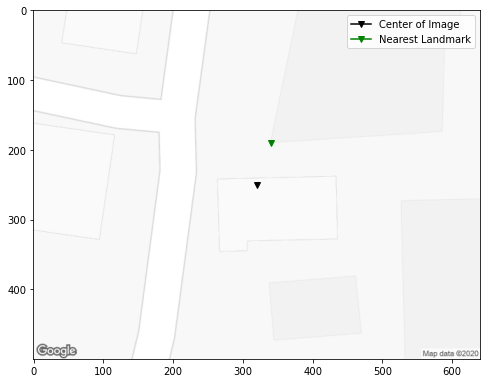

In [34]:
name = input('Enter Image Name: ')

print('\n')
try:
    findFinalDistance('Images/'+name)
except:
    print('File Not Found')

Enter Image Name: tmp_2.png


tmp2, 13, Building


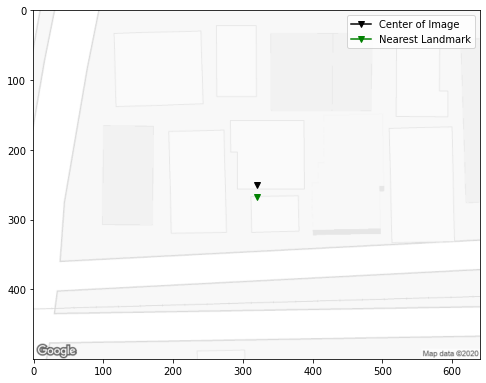

In [35]:
name = input('Enter Image Name: ')

print('\n')
try:
    findFinalDistance(name)
except:
    print('File Not Found')

Enter Image Name: tmp_3.png


tmp3, 53, Building


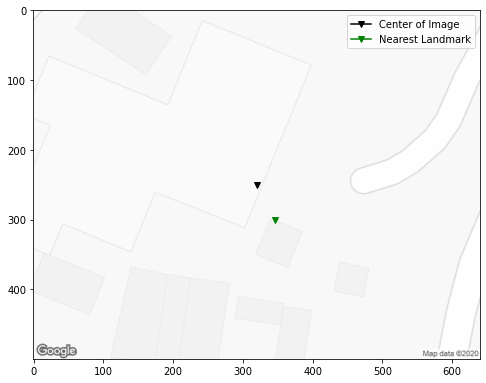

In [36]:
name = input('Enter Image Name: ')

print('\n')
try:
    findFinalDistance(name)
except:
    print('File Not Found')

The center of the image is an empty space. Therefore we find a landmark nearest to that point only.

Enter Image Name: tmp_6.png


tmp6, 11, Road


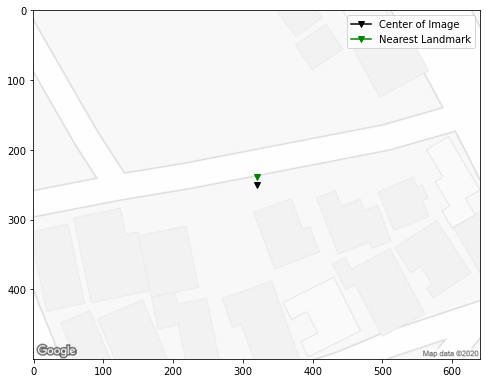

In [37]:
name = input('Enter Image Name: ')

print('\n')
try:
    findFinalDistance(name)
except:
    print('File Not Found')

Enter Image Name: tmp_7.png


tmp7, 6, Road


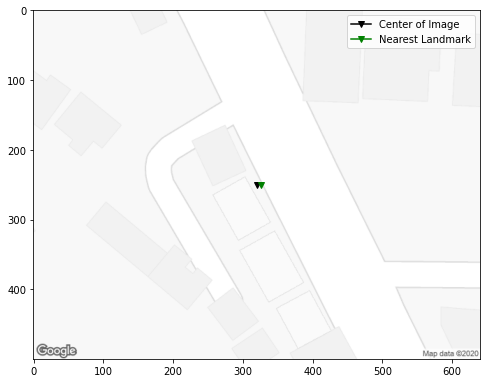

In [38]:
name = input('Enter Image Name: ')

print('\n')
try:
    findFinalDistance(name)
except:
    print('File Not Found')

The center of the image is road and we try to find the nearest landmark which is a Vegetation Cover.

Enter Image Name: tmp_8.png


tmp8, 29, Vegetation Cover


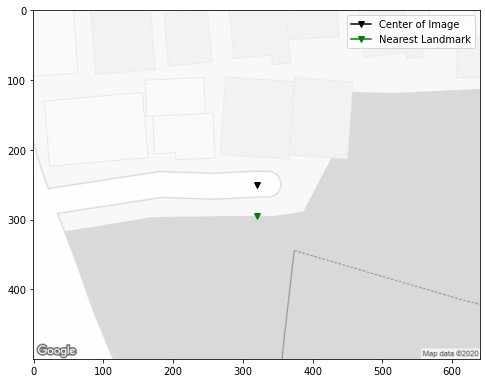

In [39]:
name = input('Enter Image Name: ')

print('\n')
try:
    findFinalDistance(name)
except:
    print('File Not Found')

Enter Image Name: tmp_9.png


tmp9, 1, Vegetation Cover


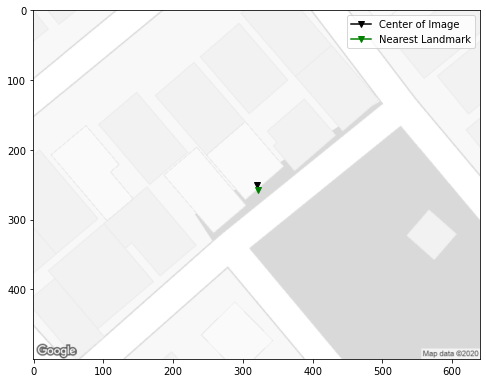

In [40]:
name = input('Enter Image Name: ')

print('\n')
try:
    findFinalDistance(name)
except:
    print('File Not Found')